In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("E:\insurance_dataset.csv") 

In [3]:
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25.0,female,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38.0,male,44.88,2.0,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25.0,male,19.89,0.0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49.0,male,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     960000 non-null   float64
 1   gender                  976000 non-null   object 
 2   bmi                     1000000 non-null  float64
 3   children                968000 non-null   float64
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              968000 non-null   object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(4), object(8)
memory usage: 91.6+ MB


In [5]:
data.shape

(1000000, 12)

In [6]:
data.isnull().sum()

age                        40000
gender                     24000
bmi                            0
children                   32000
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                 32000
coverage_level                 0
charges                        0
dtype: int64

In [7]:
data.shape

(1000000, 12)

In [8]:
data.select_dtypes(include = 'object').columns

Index(['gender', 'smoker', 'region', 'medical_history',
       'family_medical_history', 'exercise_frequency', 'occupation',
       'coverage_level'],
      dtype='object')

In [9]:
data.select_dtypes(include = ['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

<Axes: ylabel='charges'>

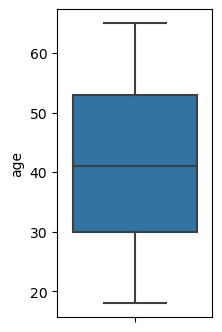

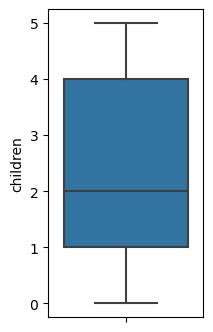

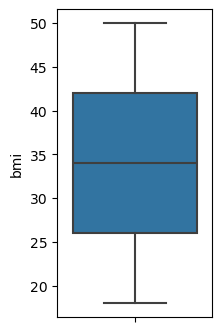

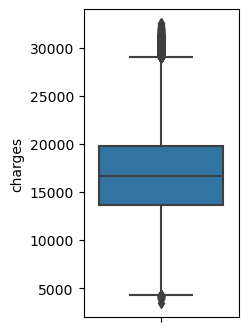

In [10]:
plt.figure(figsize = (2,4))
sns.boxplot(y = data.age)
plt.figure(figsize = (2,4))
sns.boxplot(y = data.children)
plt.figure(figsize = (2,4))
sns.boxplot(y = data.bmi)
plt.figure(figsize = (2,4))
sns.boxplot(y = data.charges)

In [11]:
# Impute missing values for numerical columns with their mean
numerical_features = ['age', 'bmi', 'children', 'charges']
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())


In [12]:
# Impute missing values for categorical columns with their mode (most frequent value)
categorical_features = ['gender', 'smoker', 'region', 'medical_history','family_medical_history', 'exercise_frequency', 'occupation','coverage_level']

for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])

In [13]:
data.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

In [14]:
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,Diabetes,Heart disease,Never,Blue collar,Premium,20460.307669
1,25.0,female,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38.0,male,44.88,2.0,yes,southwest,Heart disease,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25.0,male,19.89,0.0,no,northwest,Heart disease,Diabetes,Rarely,White collar,Standard,11789.029843
4,49.0,male,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


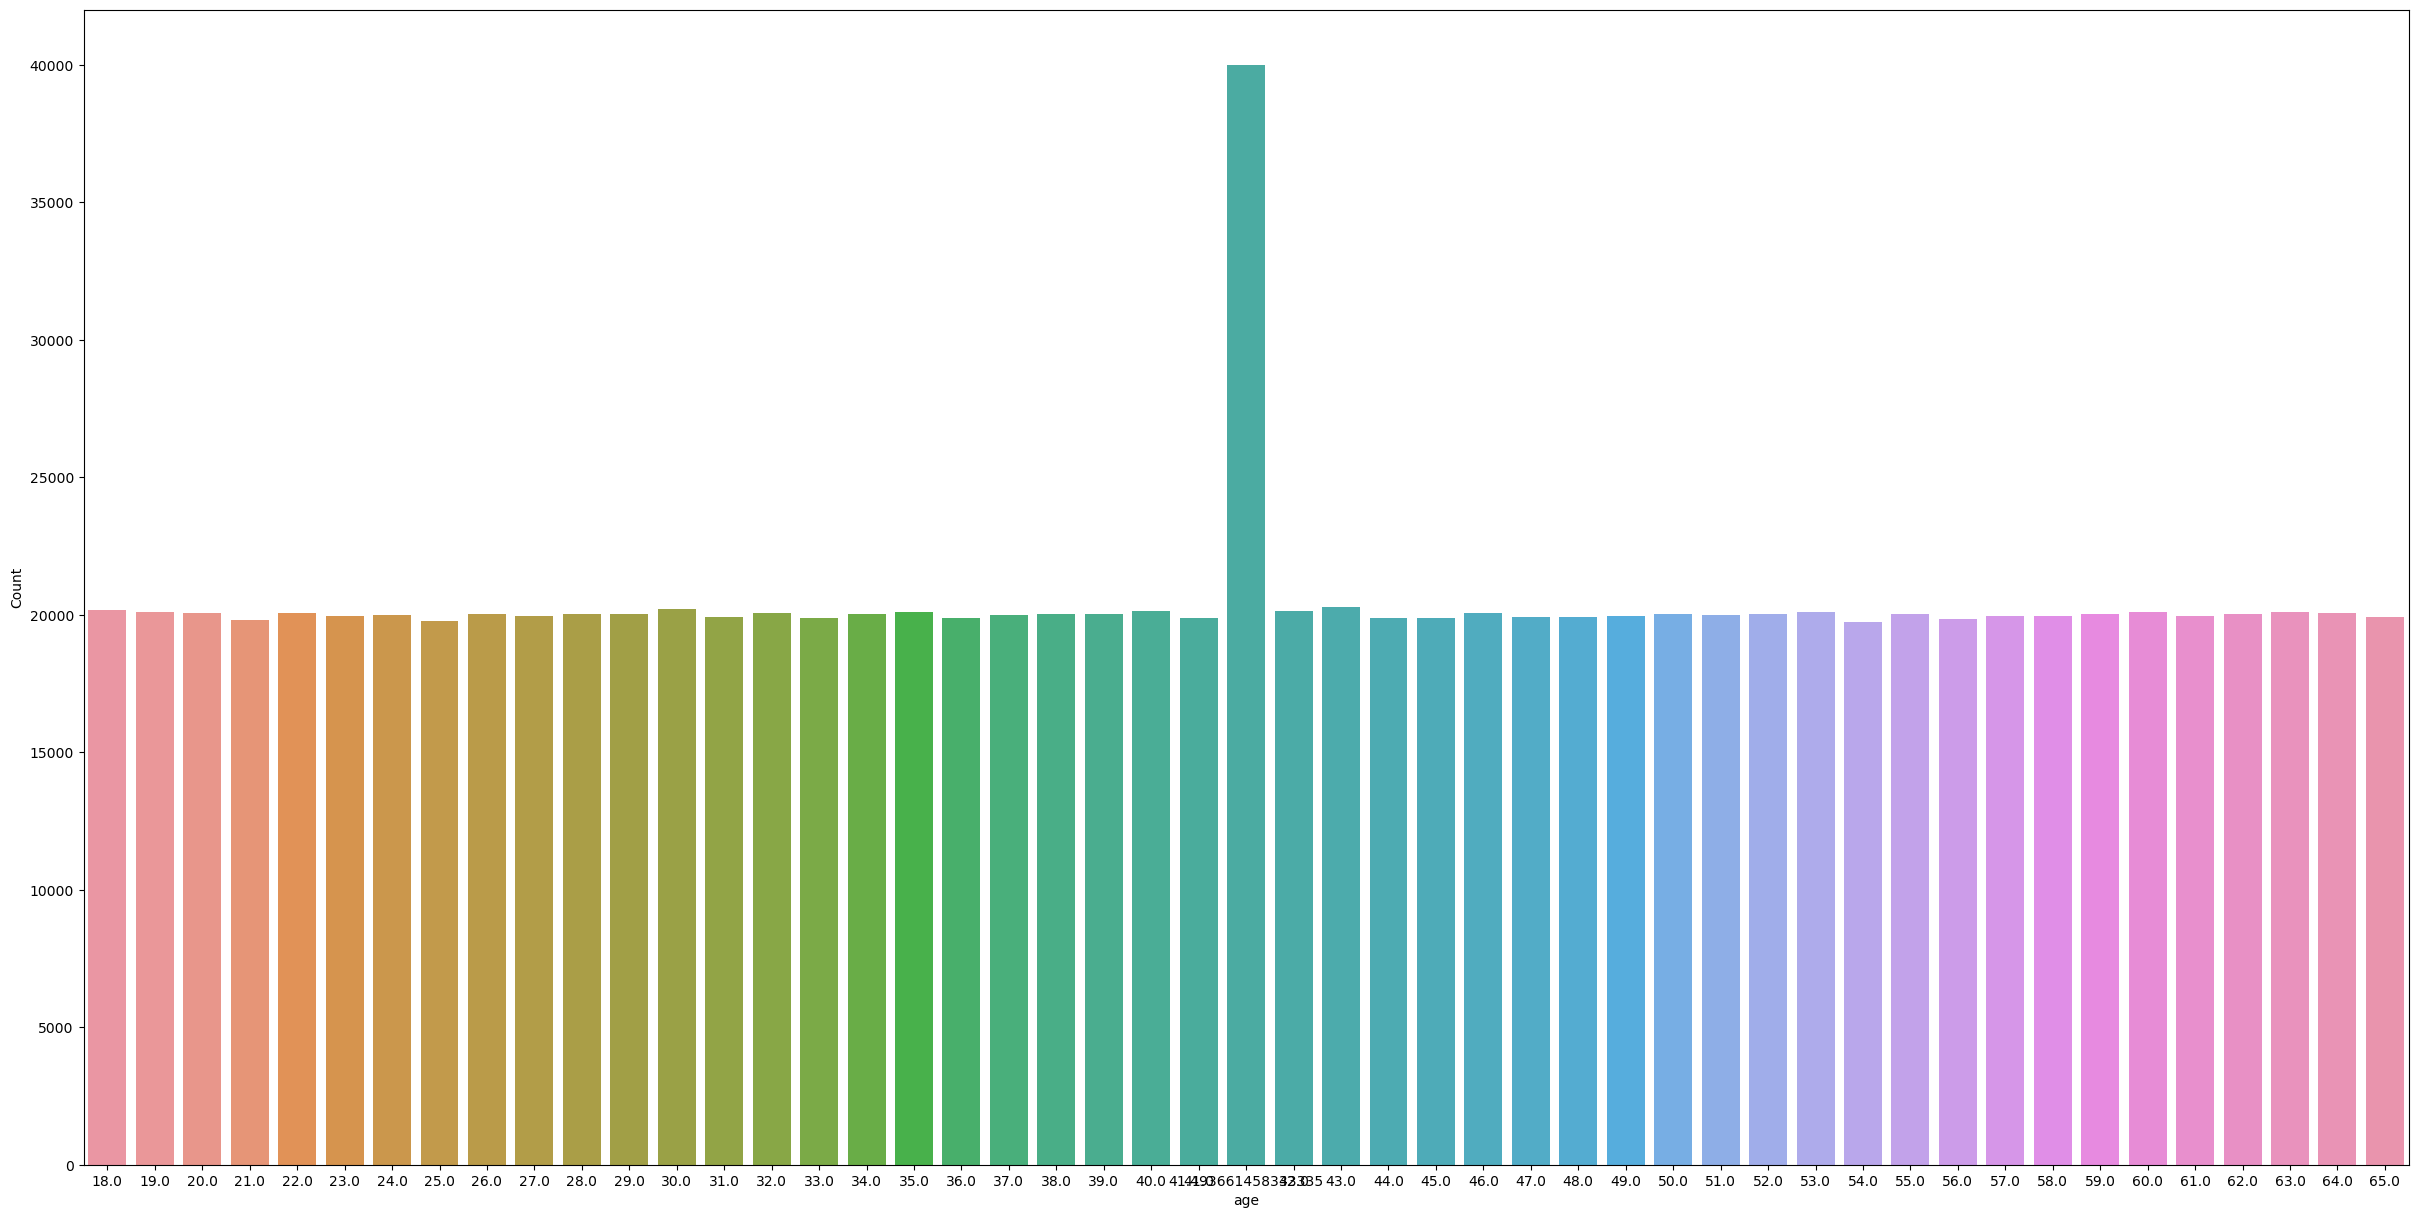

In [15]:
#data distribution for numerical column -age
plt.figure(figsize=(30, 15))
sns.countplot(x='age', data=data)
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

<Figure size 1000x1000 with 0 Axes>

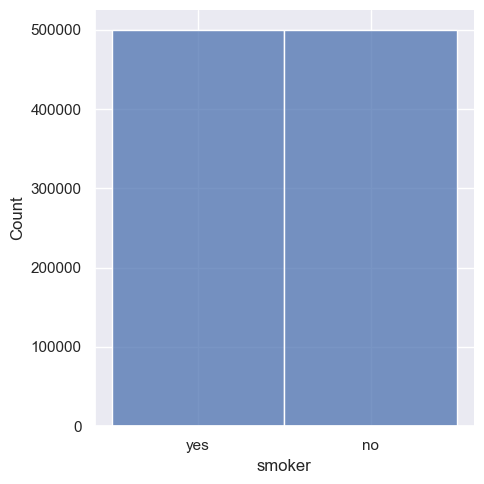

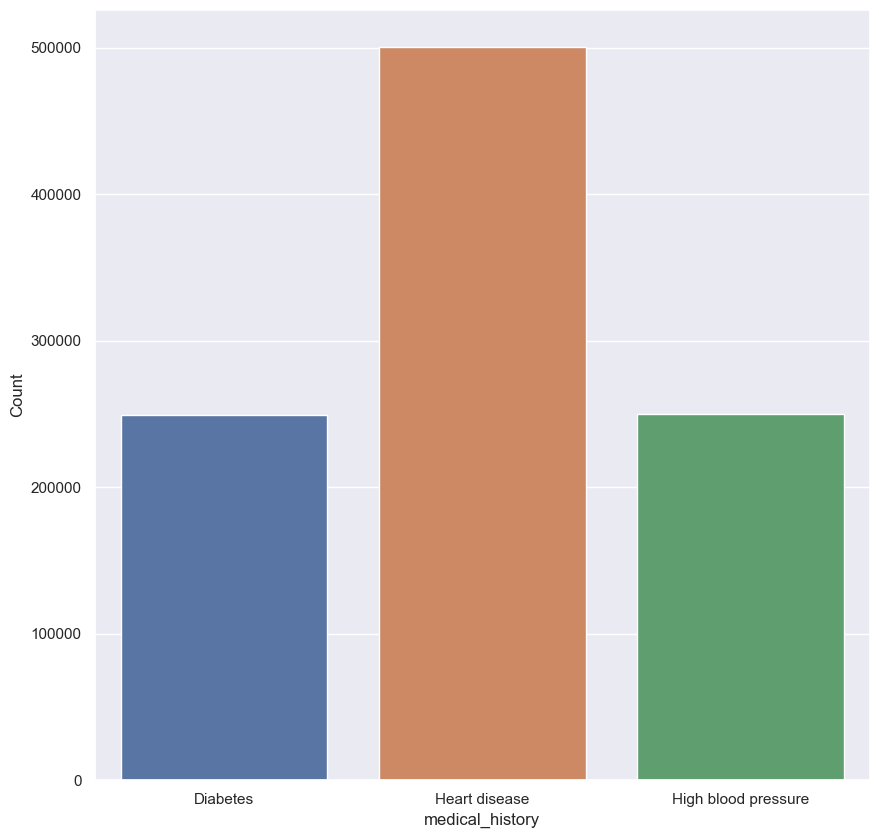

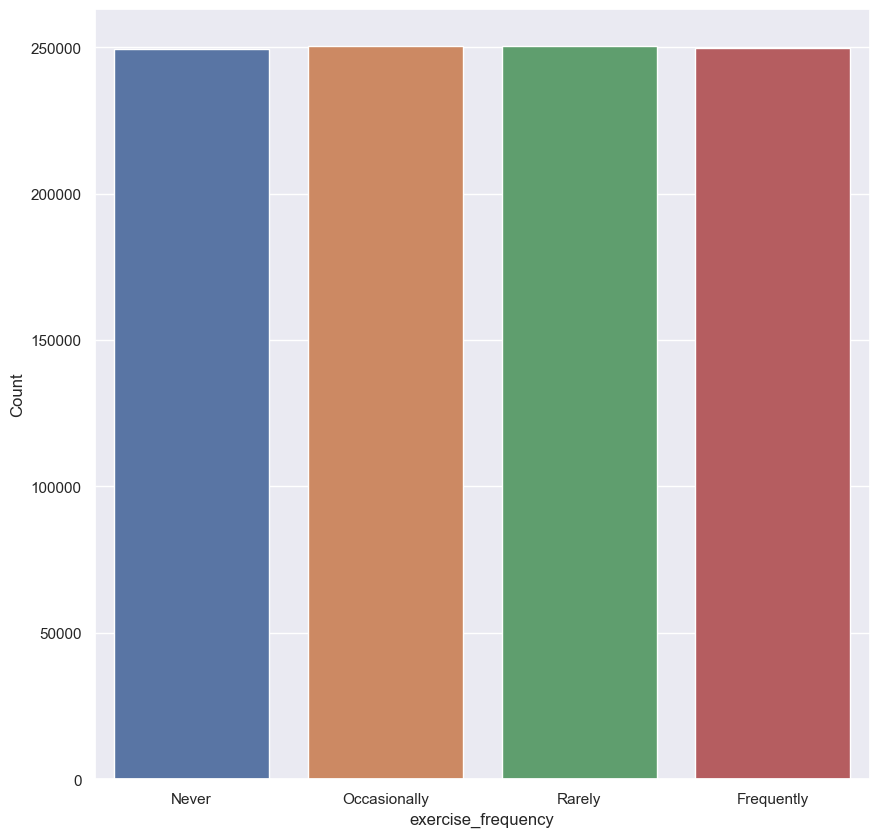

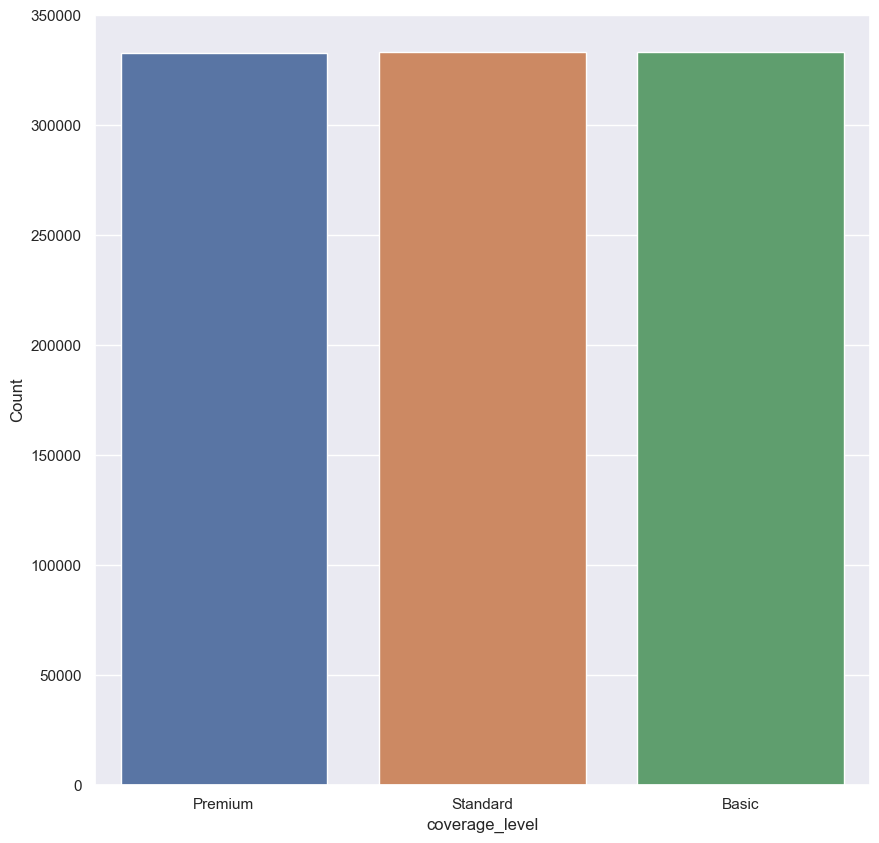

In [16]:
sns.set()
plt.figure(figsize=(10, 10))
sns.displot(x='smoker', data=data)
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()


sns.set()
plt.figure(figsize=(10, 10))
sns.countplot(x='medical_history', data=data)
plt.xlabel('medical_history')
plt.ylabel('Count')
plt.show()

sns.set()
plt.figure(figsize=(10, 10))
sns.countplot(x='exercise_frequency', data=data)
plt.xlabel('exercise_frequency')
plt.ylabel('Count')
plt.show()

sns.set()
plt.figure(figsize=(10, 10))
sns.countplot(x='coverage_level', data=data)
plt.xlabel('coverage_level')
plt.ylabel('Count')
plt.show()

In [17]:
data.gender.value_counts()

male      512151
female    487849
Name: gender, dtype: int64

In [18]:
data_cat = pd.get_dummies(data['gender'], dtype=int)
data_cat.head(10)

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,0,1
8,1,0
9,1,0


In [19]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['gender'], axis=1, inplace=True)
data.head()

,age,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,female,male
0,46.0,21.45,5.0,yes,southeast,Diabetes,Heart disease,Never,Blue collar,Premium,20460.307669,0,1
1,25.0,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218,1,0
2,38.0,44.88,2.0,yes,southwest,Heart disease,High blood pressure,Occasionally,Blue collar,Premium,20204.476302,0,1
3,25.0,19.89,0.0,no,northwest,Heart disease,Diabetes,Rarely,White collar,Standard,11789.029843,0,1
4,49.0,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838,0,1


In [20]:
data.smoker.value_counts()

yes    500129
no     499871
Name: smoker, dtype: int64

In [21]:
data_cat = pd.get_dummies(data['smoker'], dtype=int)
data_cat.head(10)

,no,yes
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
6,1,0
7,1,0
8,0,1
9,0,1


In [22]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['smoker'], axis=1, inplace=True)
data.head()

,age,bmi,children,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,female,male,no,yes
0,46.0,21.45,5.0,southeast,Diabetes,Heart disease,Never,Blue collar,Premium,20460.307669,0,1,0,1
1,25.0,25.38,2.0,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218,1,0,0,1
2,38.0,44.88,2.0,southwest,Heart disease,High blood pressure,Occasionally,Blue collar,Premium,20204.476302,0,1,0,1
3,25.0,19.89,0.0,northwest,Heart disease,Diabetes,Rarely,White collar,Standard,11789.029843,0,1,1,0
4,49.0,38.21,3.0,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838,0,1,0,1


In [23]:
data.region.value_counts()

northeast    250343
southwest    250095
northwest    249931
southeast    249631
Name: region, dtype: int64

In [24]:
data_cat = pd.get_dummies(data['region'], dtype=int)
data_cat.head(10)

,northeast,northwest,southeast,southwest
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,0,0,1,0
8,1,0,0,0
9,1,0,0,0


In [25]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['region'], axis=1, inplace=True)
data.head()

,age,bmi,children,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,46.0,21.45,5.0,Diabetes,Heart disease,Never,Blue collar,Premium,20460.307669,0,1,0,1,0,0,1,0
1,25.0,25.38,2.0,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218,1,0,0,1,0,1,0,0
2,38.0,44.88,2.0,Heart disease,High blood pressure,Occasionally,Blue collar,Premium,20204.476302,0,1,0,1,0,0,0,1
3,25.0,19.89,0.0,Heart disease,Diabetes,Rarely,White collar,Standard,11789.029843,0,1,1,0,0,1,0,0
4,49.0,38.21,3.0,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838,0,1,0,1,0,1,0,0


In [26]:
data.medical_history.value_counts()

Heart disease          500883
High blood pressure    249782
Diabetes               249335
Name: medical_history, dtype: int64

In [27]:
data_cat = pd.get_dummies(data['medical_history'], dtype=int)
data_cat.head(10)

,Diabetes,Heart disease,High blood pressure
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
9,1,0,0


In [28]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['medical_history'], axis=1, inplace=True)
data.head()

,age,bmi,children,family_medical_history,exercise_frequency,occupation,coverage_level,charges,female,male,no,yes,northeast,northwest,southeast,southwest,Diabetes,Heart disease,High blood pressure
0,46.0,21.45,5.0,Heart disease,Never,Blue collar,Premium,20460.307669,0,1,0,1,0,0,1,0,1,0,0
1,25.0,25.38,2.0,High blood pressure,Occasionally,White collar,Premium,20390.899218,1,0,0,1,0,1,0,0,1,0,0
2,38.0,44.88,2.0,High blood pressure,Occasionally,Blue collar,Premium,20204.476302,0,1,0,1,0,0,0,1,0,1,0
3,25.0,19.89,0.0,Diabetes,Rarely,White collar,Standard,11789.029843,0,1,1,0,0,1,0,0,0,1,0
4,49.0,38.21,3.0,High blood pressure,Rarely,White collar,Standard,19268.309838,0,1,0,1,0,1,0,0,1,0,0


In [29]:
data.family_medical_history.value_counts()

Heart disease          500439
High blood pressure    249824
Diabetes               249737
Name: family_medical_history, dtype: int64

In [30]:
data_cat = pd.get_dummies(data['family_medical_history'], dtype=int)
data_cat.head(10)

,Diabetes,Heart disease,High blood pressure
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,1,0,0
9,0,1,0


In [31]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['family_medical_history'], axis=1, inplace=True)
data.head()

,age,bmi,children,exercise_frequency,occupation,coverage_level,charges,female,male,no,...,northeast,northwest,southeast,southwest,Diabetes,Heart disease,High blood pressure,Diabetes,Heart disease,High blood pressure
0,46.0,21.45,5.0,Never,Blue collar,Premium,20460.307669,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,25.0,25.38,2.0,Occasionally,White collar,Premium,20390.899218,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,38.0,44.88,2.0,Occasionally,Blue collar,Premium,20204.476302,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,25.0,19.89,0.0,Rarely,White collar,Standard,11789.029843,0,1,1,...,0,1,0,0,0,1,0,1,0,0
4,49.0,38.21,3.0,Rarely,White collar,Standard,19268.309838,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [32]:
data.exercise_frequency.value_counts()

Rarely          250538
Occasionally    250362
Frequently      249746
Never           249354
Name: exercise_frequency, dtype: int64

In [33]:
data_cat = pd.get_dummies(data['exercise_frequency'], dtype=int)
data_cat.head(10)

,Frequently,Never,Occasionally,Rarely
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1
8,0,0,1,0
9,0,1,0,0


In [34]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['exercise_frequency'], axis=1, inplace=True)
data.head()

,age,bmi,children,occupation,coverage_level,charges,female,male,no,yes,...,Diabetes,Heart disease,High blood pressure,Diabetes,Heart disease,High blood pressure,Frequently,Never,Occasionally,Rarely
0,46.0,21.45,5.0,Blue collar,Premium,20460.307669,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
1,25.0,25.38,2.0,White collar,Premium,20390.899218,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
2,38.0,44.88,2.0,Blue collar,Premium,20204.476302,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,25.0,19.89,0.0,White collar,Standard,11789.029843,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
4,49.0,38.21,3.0,White collar,Standard,19268.309838,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [35]:
data.coverage_level.value_counts()

Basic       333515
Standard    333508
Premium     332977
Name: coverage_level, dtype: int64

In [36]:
data_cat = pd.get_dummies(data['coverage_level'], dtype=int)
data_cat.head(10)

,Basic,Premium,Standard
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
5,1,0,0
6,1,0,0
7,0,0,1
8,1,0,0
9,1,0,0


In [37]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['coverage_level'], axis=1, inplace=True)
data.head()

,age,bmi,children,occupation,charges,female,male,no,yes,northeast,...,Diabetes,Heart disease,High blood pressure,Frequently,Never,Occasionally,Rarely,Basic,Premium,Standard
0,46.0,21.45,5.0,Blue collar,20460.307669,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,25.0,25.38,2.0,White collar,20390.899218,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,38.0,44.88,2.0,Blue collar,20204.476302,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,25.0,19.89,0.0,White collar,11789.029843,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
4,49.0,38.21,3.0,White collar,19268.309838,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [38]:
data.occupation.value_counts()

Unemployed      274738
Student         242362
Blue collar     241707
White collar    241193
Name: occupation, dtype: int64

In [39]:
data_cat = pd.get_dummies(data['occupation'], dtype=int)
data_cat.head(10)

,Blue collar,Student,Unemployed,White collar
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,1,0,0


In [40]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['occupation'], axis=1, inplace=True)
data.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,...,Never,Occasionally,Rarely,Basic,Premium,Standard,Blue collar,Student,Unemployed,White collar
0,46.0,21.45,5.0,20460.307669,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
1,25.0,25.38,2.0,20390.899218,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,38.0,44.88,2.0,20204.476302,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
3,25.0,19.89,0.0,11789.029843,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,49.0,38.21,3.0,19268.309838,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1


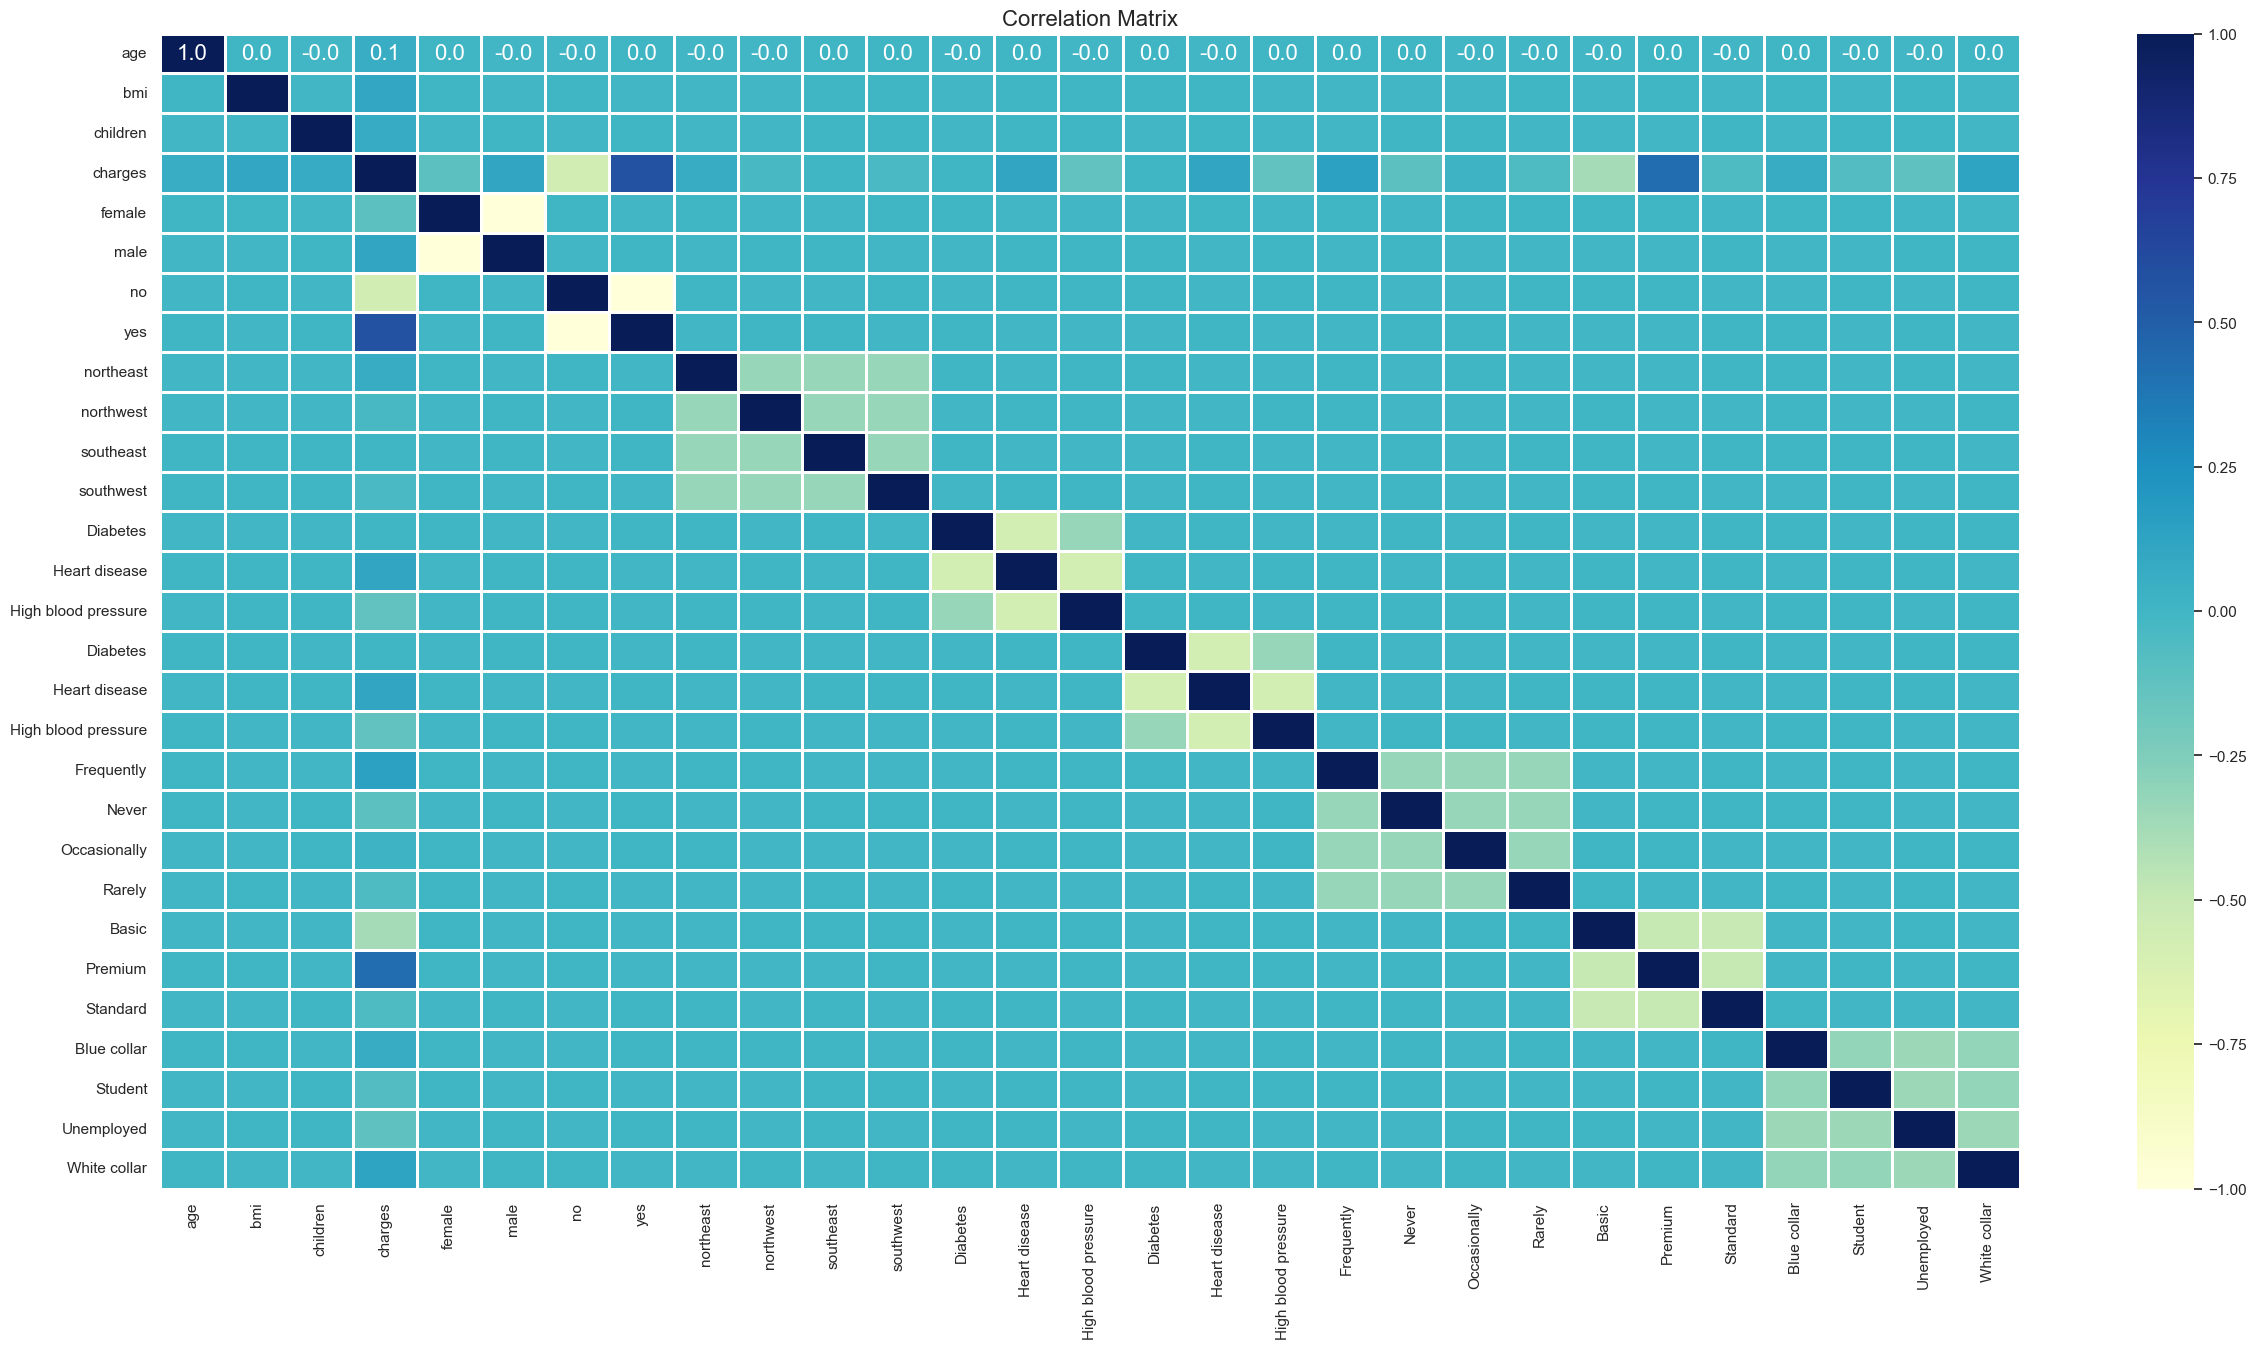

In [41]:
plt.figure(figsize=(30, 15))
sns.heatmap(data.corr(), cmap='YlGnBu', fmt='.1f', linewidths=1, annot=True, annot_kws={"size": 16})
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [42]:
data.corr()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,...,Never,Occasionally,Rarely,Basic,Premium,Standard,Blue collar,Student,Unemployed,White collar
age,1.000000,0.001212,-0.001431,0.062347,0.001125,-0.001125,-0.000936,0.000936,-0.000699,-0.000848,...,0.000820,-0.000416,-0.000630,-0.000249,0.000360,-0.000111,0.000384,-0.000677,-0.000091,0.000388
bmi,0.001212,1.000000,-0.001735,0.104429,0.001340,-0.001340,0.000225,-0.000225,-0.000055,-0.001828,...,-0.000344,-0.001001,0.001389,-0.000198,0.001212,-0.001014,0.001186,-0.001046,0.000307,-0.000459
children,-0.001431,-0.001735,1.000000,0.075545,-0.000546,0.000546,-0.000029,0.000029,-0.000235,-0.000585,...,0.001538,0.000035,-0.000224,-0.000058,-0.000998,0.001055,-0.000382,0.000394,0.000797,-0.000844
charges,0.062347,0.104429,0.075545,1.000000,-0.110750,0.110750,-0.566213,0.566213,0.065537,-0.026989,...,-0.113486,0.017532,-0.050772,-0.375051,0.426814,-0.051592,0.063872,-0.063772,-0.122225,0.127490
female,0.001125,0.001340,-0.000546,-0.110750,1.000000,-1.000000,0.000034,-0.000034,0.000293,-0.000603,...,-0.000648,0.000513,0.000112,0.000802,0.000163,-0.000966,0.001227,0.000205,-0.000868,-0.000527
male,-0.001125,-0.001340,0.000546,0.110750,-1.000000,1.000000,-0.000034,0.000034,-0.000293,0.000603,...,0.000648,-0.000513,-0.000112,-0.000802,-0.000163,0.000966,-0.001227,-0.000205,0.000868,0.000527
no,-0.000936,0.000225,-0.000029,-0.566213,0.000034,-0.000034,1.000000,-1.000000,0.001116,-0.000366,...,-0.001294,-0.001813,0.003002,0.000668,0.000706,-0.001374,-0.001155,0.001952,-0.000988,0.000232
yes,0.000936,-0.000225,0.000029,0.566213,-0.000034,0.000034,-1.000000,1.000000,-0.001116,0.000366,...,0.001294,0.001813,-0.003002,-0.000668,-0.000706,0.001374,0.001155,-0.001952,0.000988,-0.000232
northeast,-0.000699,-0.000055,-0.000235,0.065537,0.000293,-0.000293,0.001116,-0.001116,1.000000,-0.333577,...,-0.001649,0.001415,-0.000242,-0.001455,-0.000105,0.001560,0.000838,-0.001118,0.000322,-0.000054
northwest,-0.000848,-0.001828,-0.000585,-0.026989,-0.000603,0.000603,-0.000366,0.000366,-0.333577,1.000000,...,-0.000349,-0.000044,-0.000097,0.001226,-0.000398,-0.000828,0.000437,-0.000220,-0.001120,0.000952


In [43]:
# Split the dataset as per the problem statement
train_data = data.iloc[:700000]   # First 700K for training
val_data = data.iloc[700000:900000]  # Next 200K for validation
live_data = data.iloc[900000:]  # Last 100K for testing


In [44]:
x_train = data.drop(columns='charges') #train data  
y_train= data['charges']    # Target variable
x_test = val_data.drop(columns=['charges']) # validation data
y_test = val_data['charges']   #validation data
x_live = live_data.drop(columns=['charges']) #live data

Feature scalling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
x_train

array([[ 0.33193936, -1.35964904,  1.48792576, ..., -0.56558957,
        -0.61547711, -0.56378911],
       [-1.2149321 , -0.93394083, -0.29757408, ..., -0.56558957,
        -0.61547711,  1.77371286],
       [-0.25734501,  1.17835179, -0.29757408, ..., -0.56558957,
        -0.61547711, -0.56378911],
       ...,
       [-0.18368446,  0.63240539, -1.48790731, ..., -0.56558957,
        -0.61547711, -0.56378911],
       [-0.33100556,  1.19784988,  0.89275914, ..., -0.56558957,
         1.6247558 , -0.56378911],
       [-0.03636337, -0.43132351, -0.29757408, ..., -0.56558957,
        -0.61547711, -0.56378911]])

multiple linear regression

In [47]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor_lr.predict(x_test)

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

In [50]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1983.15
MSE: 6396192.98
RMSE: 2529.07
R² Score: 0.67


 XGBRFRegressor

In [51]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [52]:
y_pred = regressor_xgb.predict(x_test)

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

In [54]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 2247.44
MSE: 7651125.23
RMSE: 2766.07
R² Score: 0.61


RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
Random_lr = RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)
Random_lr.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42)

In [56]:
y_pred = Random_lr.predict(x_test)

In [57]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

In [58]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1885.00
MSE: 5743516.14
RMSE: 2396.56
R² Score: 0.71


In [59]:
import pickle as pkl

In [60]:
pkl.dump(Random_lr,open('MIPPML.pkl','wb'))

<Axes: title={'center': 'Feature Importance (Random Forest)'}>

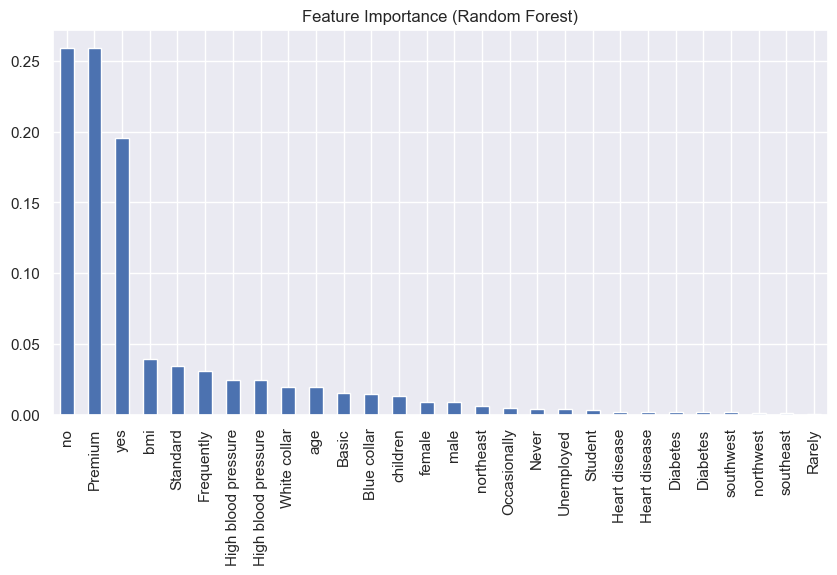

In [61]:
import pandas as pd

# Convert x_train back to DataFrame with feature names
x_train_df = pd.DataFrame(x_train, columns=x_live.columns)

# Get feature importance
feature_importance = pd.Series(Random_lr.feature_importances_, index=x_train_df.columns)

# Plot feature importance
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance (Random Forest)")
